# Final Project - Zillow Analysis 

#### Presented by Radhi Patel, Yi An Pan (Emma)

The goal for this project is to train machine learning models to predict All Homes For-Sale Inventory and Median Sale Price in Top 5 Metro Areas in the United States for future buyers and real estate professionals evaluating the market.

## Top 5 Metro Areas in the United States
* New York, NY
* Los Angeles-Long Beach-Anaheim, CA
* Chicago, IL
* Dallas-Fort Worth, TX
* Houston, TX

## Machine Learning Models
* ARIMA
* Moving Average
* Naïve
* Simple Exponential Smoothing  
* Holt Winter (Additive)

## Split Train/Test Data - For-Sale Inventory 

In [13]:
train, test = temporal_train_test_split(inventory)
print(train.shape[0], test.shape[0])

115 39


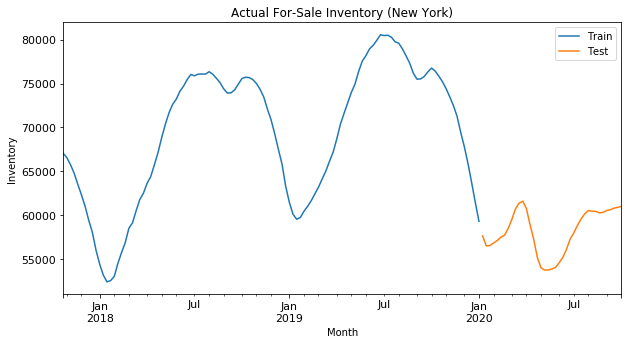

In [14]:
train.inventory.plot(figsize=(10,5), fontsize=11, label='Train')
test.inventory.plot(figsize=(10,5), fontsize=11, label='Test')

plt.title("Actual For-Sale Inventory (New York)")
plt.xlabel('Month')
plt.ylabel('Inventory')
plt.legend(loc='best')
plt.show()

# ARIMA

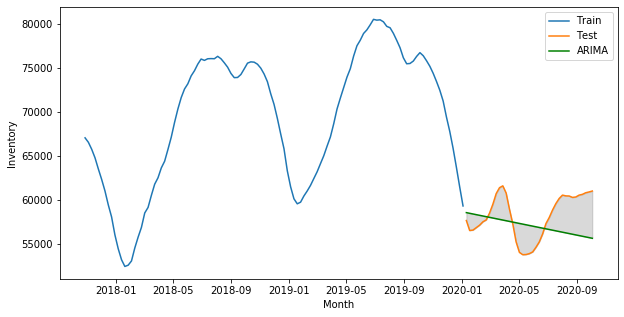

In [17]:
#ARIMA chart
plt.figure(figsize=(10,5))
plt.plot(train['inventory'], label='Train')
plt.plot(test['inventory'], label='Test')
plt.plot(test['arima'], label='ARIMA', color='green')

lower_series = test['inventory']
upper_series = test['arima']

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.xlabel('Month')
plt.ylabel('Inventory')
plt.legend(loc='best')
plt.show()

In [18]:
RMSE_arima = sm.tools.eval_measures.rmse(test.inventory,test['arima'])
print('RMSE', '=', RMSE_arima)

RMSE = 3105.296101251935


# Moving Average

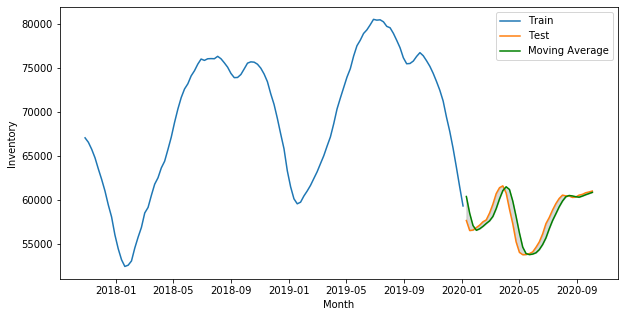

In [20]:
#Moving Average chart
plt.figure(figsize=(10,5))
plt.plot(train['inventory'], label='Train')
plt.plot(test['inventory'], label='Test')
plt.plot(test['ma'], label='Moving Average', color='green')

lower_series = test['inventory']
upper_series = test['ma']

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.xlabel('Month')
plt.ylabel('Inventory')
plt.legend(loc='best')
plt.show()

In [21]:
RMSE_ma = sm.tools.eval_measures.rmse(test.inventory,test['ma'])
print('RMSE', '=', RMSE_ma)

RMSE = 1214.686614116094


# Naive

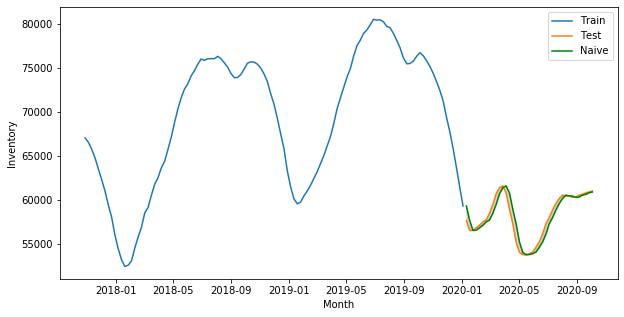

In [23]:
#Naive chart
plt.figure(figsize=(10,5))
plt.plot(train['inventory'], label='Train')
plt.plot(test['inventory'], label='Test')
plt.plot(test['naive'], label='Naive', color='green')

lower_series = test['inventory']
upper_series = test['naive']

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.ylabel('Inventory')
plt.xlabel('Month')
plt.legend(loc='best')
plt.show()

In [24]:
RMSE_naive = sm.tools.eval_measures.rmse(test.inventory,test['naive'])
print('RMSE', '=', RMSE_naive)

RMSE = 812.857779215263


# Simple Exponenital Smoothing 

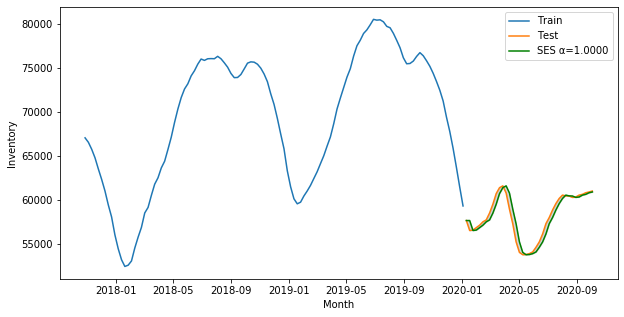

In [26]:
#Simple Exponenital Smoothing chart
plt.figure(figsize=(10,5))
plt.plot(train['inventory'], label='Train')
plt.plot(test['inventory'], label='Test')
plt.plot(test['ses'], label='SES \u03B1='+ "{:.4f}".format(ses.model.params['smoothing_level']), color='green')

lower_series = test['inventory']
upper_series = test['ses']

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.ylabel('Inventory')
plt.xlabel('Month')
plt.legend(loc='best')
plt.show()

In [27]:
RMSE_ses = sm.tools.eval_measures.rmse(test.inventory,test['ses'])
print('RMSE', '=', RMSE_ses)

RMSE = 768.2782782433152


# Holt Winter (Additive)

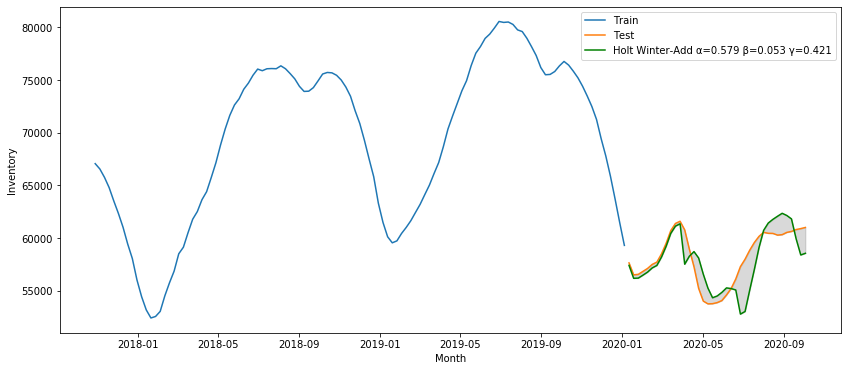

In [29]:
#Holt Winter (Additive) chart
plt.figure(figsize=(14,6))
plt.plot(train['inventory'], label='Train')
plt.plot(test['inventory'], label='Test')
plt.plot(test['holtwinter_add'], label='Holt Winter-Add \u03B1='+"{:.3f}".format(holtwinter_add.model.params['smoothing_level'])+' \u03B2='+"{:.3f}".format(holtwinter_add.model.params['smoothing_slope'])+' \u03B3='+"{:.3f}".format(holtwinter_add.model.params['smoothing_seasonal']), color='green')

lower_series = test['inventory']
upper_series = test['holtwinter_add']

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.ylabel('Inventory')
plt.xlabel('Month')
plt.legend(loc='best')
plt.show()

In [30]:
RMSE_holtwinter_add = sm.tools.eval_measures.rmse(test.inventory,test['holtwinter_add'])
print('RMSE', '=', RMSE_holtwinter_add)

RMSE = 1812.8135174968002


## Summary

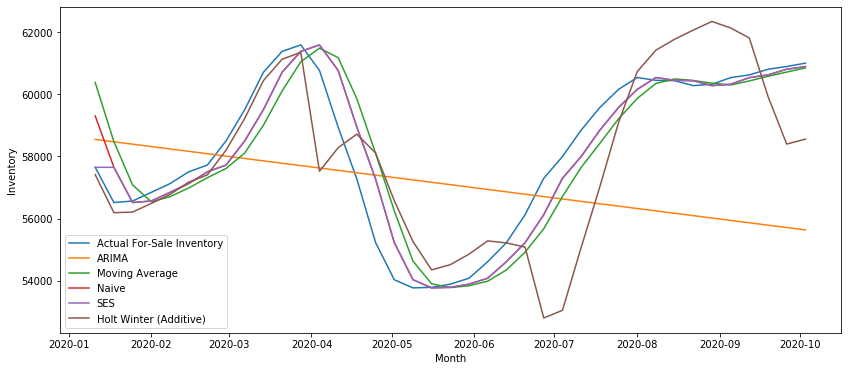

In [39]:
plt.figure(figsize=(14,6))
plt.plot(test['inventory'], label='Actual For-Sale Inventory')
plt.plot(test['arima'], label='ARIMA')
plt.plot(test['ma'] , label='Moving Average')
plt.plot(test['naive'] , label='Naive')
plt.plot(test['ses'] , label='SES')
plt.plot(test['holtwinter_add'] , label='Holt Winter (Additive)')

plt.ylabel('Inventory')
plt.xlabel('Month')
plt.legend(loc='best')
plt.show()

In [40]:
RMSE = pd.DataFrame({'Model':['ARIMA', 'Moving Average', 'Naive','Simple Exponential Smoothing','Holt Winter (Additive)'],
                     'RMSE':[RMSE_arima, RMSE_ma, RMSE_naive, RMSE_ses, RMSE_holtwinter_add]})
RMSE

,Model,RMSE
0,ARIMA,3105.296101
1,Moving Average,1214.686614
2,Naive,812.857779
3,Simple Exponential Smoothing,768.278278
4,Holt Winter (Additive),1812.813517


### We choose to use "Simple Exponential Smoothing" method to predict future For-Sale Inventory

## Prediction

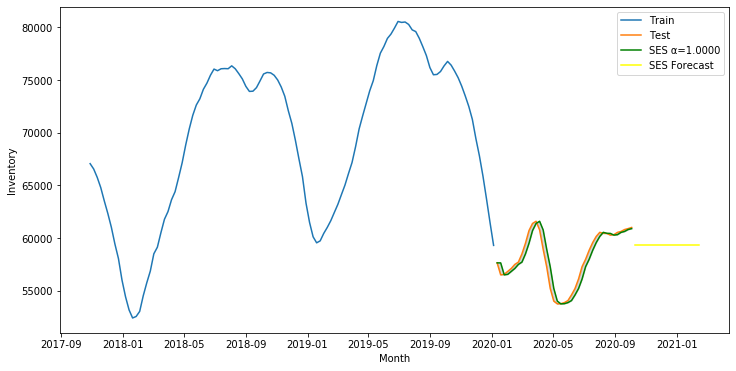

In [37]:
#Updated SES chart 
plt.figure(figsize=(12,6))
plt.plot(train['inventory'], label='Train')
plt.plot(test['inventory'], label='Test')
plt.plot(test['ses'], label='SES \u03B1='+ "{:.4f}".format(ses.model.params['smoothing_level']), color='green')
plt.plot(test['forecast'], label='SES Forecast', color='yellow')

lower_series = test['inventory']
upper_series = test['ses']

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.ylabel('Inventory')
plt.xlabel('Month')
plt.legend(loc='best')
plt.show()

# Median Sale Price

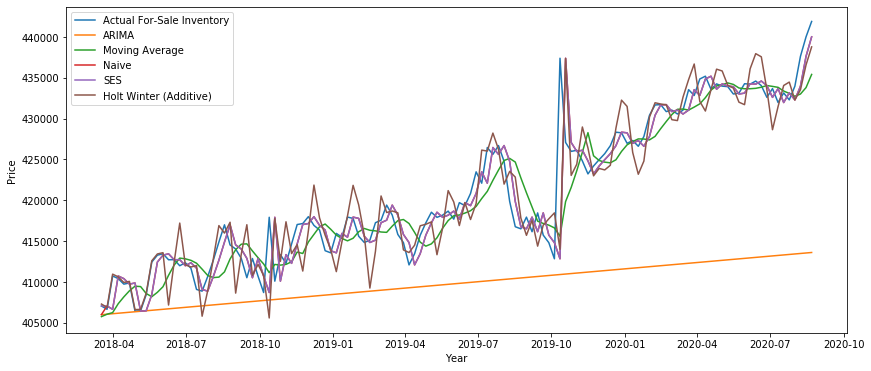

In [78]:
plt.figure(figsize=(14,6))
plt.plot(test['price'], label='Actual For-Sale Inventory')
plt.plot(test['arima'], label='ARIMA')
plt.plot(test['ma'] , label='Moving Average')
plt.plot(test['naive'] , label='Naive')
plt.plot(test['ses'] , label='SES')
plt.plot(test['holtwinter_add'] , label='Holt Winter (Additive)')

plt.ylabel('Price')
plt.xlabel('Year')
plt.legend(loc='best')
plt.show()

In [79]:
RMSE = pd.DataFrame({'Model':['ARIMA', 'Moving Average', 'Naive','Simple Exponential Smoothing','Holt Winter (Additive)'],
                     'RMSE':[RMSE_arima, RMSE_ma, RMSE_naive, RMSE_ses, RMSE_holtwinter_add]})
RMSE

,Model,RMSE
0,ARIMA,13100.206978
1,Moving Average,3396.479728
2,Naive,3081.740028
3,Simple Exponential Smoothing,3080.355524
4,Holt Winter (Additive),3701.432964


### We choose to use "Simple Exponential Smoothing" method to predict future Median Sale Price

## Prediction

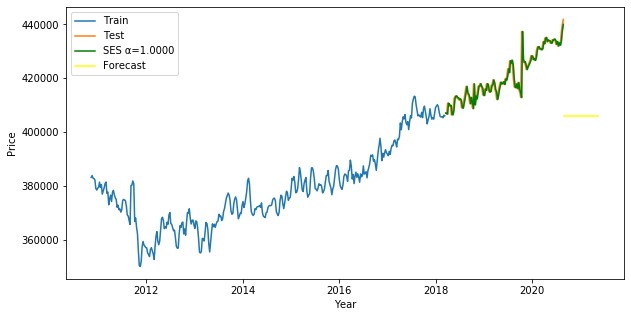

In [76]:
#Simple Exponenital Smoothing chart
plt.figure(figsize=(10,5))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(test['ses'], label='SES \u03B1='+ "{:.4f}".format(ses.model.params['smoothing_level']), color='green')
plt.plot(test['forecast'], label='Forecast', color='yellow')

lower_series = test['price']
upper_series = test['ses']

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.ylabel('Price')
plt.xlabel('Year')
plt.legend(loc='best')
plt.show()

In [79]:
RMSE = pd.DataFrame({'Model':['ARIMA', 'Moving Average', 'Naive','Simple Exponential Smoothing','Holt Winter (Additive)'],
                     'RMSE':[RMSE_arima, RMSE_ma, RMSE_naive, RMSE_ses, RMSE_holtwinter_add]})
RMSE

,Model,RMSE
0,ARIMA,13100.206978
1,Moving Average,3396.479728
2,Naive,3081.740028
3,Simple Exponential Smoothing,3080.355524
4,Holt Winter (Additive),3701.432964


### Now let's check out the website - https://zillow-metro-analysis.herokuapp.com/